In [8]:
import importlib

import numpy as np
import matplotlib.pyplot as plt


import dataloader as dl
import detect_pulses as dp
import pantompkins as pt

dir = r'E:\OneDrive\School\Technical Medicine\TM Jaar 1\TM12004 - Advanced Signal Processing\data'

In [9]:
import numpy as np
import matplotlib.pyplot as plt
imported_data, imported_data_details = dl.import_data(r'c:\Users\mdcalje\OneDrive\School\Technical Medicine\TM Jaar 1\TM12004 - Advanced Signal Processing\data')
data = dl.restructure_data(imported_data)

In [ ]:
importlib.reload(dp)
importlib.reload(dl)
importlib.reload(pt)

print(data.keys())
data_test = data['005_Pimpel_2.mat', 'data']

mask_filter = dp.filter_data(data,"005_Pimpel_2.mat")
idx_pulses = dp.detect_pulses(data, mask_filter, "005_Pimpel_2.mat")


data_plot = data_test[:,1]
data_raw = data_test[:,1]
data_mask = idx_pulses[:,1]

fs = data['005_Pimpel.mat', 'header', 'sample_rate']

time = np.arange(0,len(data_plot),1) / fs

data_plot = dp.remove_pulses(data_plot, data_mask)

qrs_idx, data_pt = pt.pan_tompkins(data_plot, fs)
qrs_mask = pt.convert_to_bool(data_plot, qrs_idx)
p_idx = pt.find_p_tops(data_plot, qrs_idx, fs)
p_mask = pt.convert_to_bool(data_plot, p_idx)
classified = pt.classify_pacing(p_mask, qrs_mask, data_mask, fs)
time_pt = np.arange(0,len(data_pt),1) / fs
pt.classify_pacemaker_settings(classified, p_mask)
# Calculate RR intervals in seconds
rr_intervals = np.diff(qrs_idx) / fs

# Calculate instantaneous heart rate in beats per minute
heart_rate = 60 / rr_intervals

# Calculate mean heart rate
mean_hr = np.mean(heart_rate)
print(f"Mean heart rate: {mean_hr:.1f} BPM")


dict_keys([('005_Pimpel.mat', 'data'), ('005_Pimpel.mat', 'header', 'sample_rate'), ('005_Pimpel.mat', 'header', 'sample_size'), ('005_Pimpel_1.mat', 'data'), ('005_Pimpel_1.mat', 'header', 'sample_rate'), ('005_Pimpel_1.mat', 'header', 'sample_size'), ('005_Pimpel_2.mat', 'data'), ('005_Pimpel_2.mat', 'header', 'sample_rate'), ('005_Pimpel_2.mat', 'header', 'sample_size'), ('005_Pimpel_3.mat', 'data'), ('005_Pimpel_3.mat', 'header', 'sample_rate'), ('005_Pimpel_3.mat', 'header', 'sample_size')])
type
Ventricular    771
Atrial          43
Name: count, dtype: int64 83841
Mean heart rate: 95.5 BPM


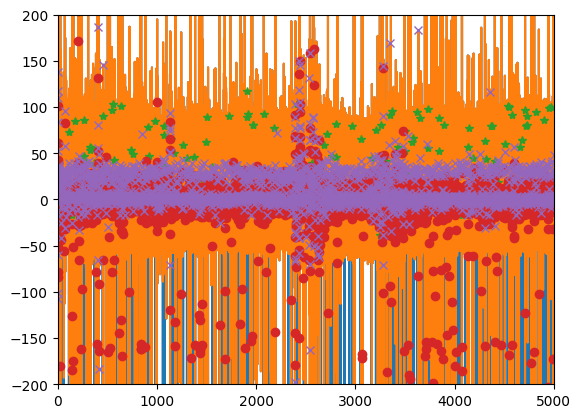

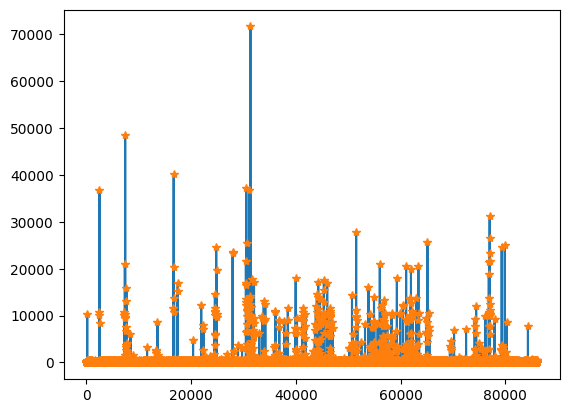

In [ ]:

plt.figure()
plt.plot(time, data_raw)
plt.plot(time, data_plot)
plt.plot(time[data_mask],data_plot[data_mask],"*")
plt.plot(time[qrs_mask],data_plot[qrs_mask],"o")
plt.plot(time[p_mask],data_plot[p_mask],"x")
plt.axis([2000,5000,-200, 200])

plt.figure()
plt.plot(time_pt, data_pt)
plt.plot(time_pt[qrs_mask[:-1]], data_pt[qrs_mask[:-1]],"*")
